<a href="https://colab.research.google.com/github/MartaP21/Cwiczenia-JS/blob/master/Copy_of_supervised_data_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Przygotowanie danych i klasyfikacja zgłoszeń IT

## 🛠️ 1. Import bibliotek

Ładujemy wszystkie narzędzia potrzebne do analizy i budowy modelu: pandas, numpy, scikit-learn, matplotlib i seaborn.

### 📖 Wytłumaczenie:
Bez bibliotek nie ruszymy dalej. Pandas do danych, sklearn do ML, matplotlib i seaborn do wizualizacji wyników.

### 💡 Ćwiczenie:
Dodaj `import random` i użyj `random.randint(1, 10)` do wylosowania liczby.


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## 📝 2. Stworzenie przykładowych danych tekstowych

Budujemy prosty zbiór zgłoszeń IT: opis + kategoria ("Sprzęt", "Sieć", itd.).

### 📖 Wytłumaczenie:
Tworzymy miniaturową bazę danych zgłoszeń, na której będziemy trenować nasz model ML.

### 💡 Ćwiczenie:
Dodaj 2 własne zgłoszenia – jedno typowo techniczne, drugie bardziej ogólne.


In [ ]:
texts = [
    "Drukarka nie drukuje",                         # Sprzęt
    "Awaria drukarki HP",                            # Sprzęt
    "Drukarki HP działają niepoprawnie",             # Sprzęt
    "Reklamacja niedziałającego routera",            # Sprzęt
    "Problem z nowym monitorem",                     # Sprzęt
    "Resetowanie hasła",                             # Konto
    "Nie mogę się zalogować",                        # Konto
    "Problem z logowaniem do systemu",               # Konto
    "Blokada konta po wielu próbach logowania",      # Konto
    "Prośba o zmianę uprawnień w systemie",           # Konto
    "Zmiana ustawień sieciowych",                    # Sieć
    "Problem z internetem",                          # Sieć
    "VPN przerywa połączenie",                       # Sieć
    "Brak dostępu do zasobów sieciowych",             # Sieć
    "Problem z połączeniem WiFi",                    # Sieć
    "Problem z funkcjonalnością aplikacji",          # Oprogramowanie
    "Błąd działania aplikacji CRM",                  # Oprogramowanie
    "System ERP nie odpowiada",                      # Oprogramowanie
    "Zgłoszenie błędu w aplikacji mobilnej",          # Oprogramowanie
    "Nie działa aktualizacja programu",              # Oprogramowanie
]

labels = [
    "Sprzęt", "Sprzęt", "Sprzęt", "Sprzęt", "Sprzęt",
    "Konto", "Konto", "Konto", "Konto", "Konto",
    "Sieć", "Sieć", "Sieć", "Sieć", "Sieć",
    "Oprogramowanie", "Oprogramowanie", "Oprogramowanie", "Oprogramowanie", "Oprogramowanie"
]

## 🧹 3. Proste czyszczenie tekstu

Tworzymy funkcję czyszczącą: małe litery, usunięcie znaków specjalnych, usunięcie zbędnych spacji.

### 📖 Wytłumaczenie:
Przed uczeniem musimy "uprasować" dane — model lepiej działa na czystym, jednolitym tekście.

### 💡 Ćwiczenie:
Dodaj usuwanie cyfr (`\d`) w funkcji czyszczącej.


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    return text

## 🔤 4. Pseudo-lematyzacja dla polskiego

Budujemy prostą mapę zamian słów na ich podstawowe formy ("drukarki" → "drukarka").

### 📖 Wytłumaczenie:
Dzięki lematyzacji model rozpozna różne odmiany tych samych wyrazów jako to samo znaczenie.

### 💡 Ćwiczenie:
Dodaj własną zamianę np. `"routery": "router"`.


In [ ]:
lemma_map = {
    "drukarki": "drukarka",
    "drukarce": "drukarka",
    "drukarkę": "drukarka",
    "funkcjonalności": "funkcjonalność",
    "ustawien": "ustawienia"
}

def apply_lemma(text):
    for key, val in lemma_map.items():
        text = text.replace(key, val)
    return text

## 🔄 5. Zastosowanie czyszczenia i lematyzacji

Łączymy czyszczenie i mapowanie — przygotowujemy końcowe dane do nauki.

### 📖 Wytłumaczenie:
Każde zgłoszenie przechodzi przez funkcję czyszczenia i lematyzacji. Dzięki temu model dostanie dane wysokiej jakości.

### 💡 Ćwiczenie:
Wydrukuj pierwsze zgłoszenie przed i po czyszczeniu, aby zobaczyć efekt.


In [ ]:
texts_cleaned = [apply_lemma(clean_text(t)) for t in texts]

## ✂️ 6. Podział na zbiory treningowe i testowe

Dzielimy dane na część do nauki i część do testowania.

### 📖 Wytłumaczenie:
Dzięki podziałowi sprawdzimy, czy model naprawdę nauczył się generalizować, a nie tylko zapamiętał dane.

### 💡 Ćwiczenie:
Zmień `test_size` na `0.5` i sprawdź jak zmieni się skuteczność modelu.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    texts_cleaned, labels, test_size=0.3, random_state=42, stratify=labels
)

## 🔢 7. Przekształcenie tekstu na liczby (TF-IDF)

Przekształcamy tekst na liczby, aby model mógł z nimi pracować.

### 📖 Wytłumaczenie:
Komputer nie rozumie tekstu — zamieniamy zgłoszenia na macierze liczb reprezentujących ważność słów.

### 💡 Ćwiczenie:
Użyj parametru `stop_words='english'` i zobacz, czy coś się zmieni (nawet jeśli dane są po polsku).


In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## 🧠 8. Trenowanie modelu klasyfikacyjnego

Budujemy model regresji logistycznej i uczymy go na przygotowanych danych.

### 📖 Wytłumaczenie:
Model uczy się rozpoznawać wzorce między opisami zgłoszeń a kategoriami.

### 💡 Ćwiczenie:
Zamień `LogisticRegression()` na `DecisionTreeClassifier()` i porównaj wyniki.


In [ ]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

## 📊 9. Ewaluacja modelu

Sprawdzamy jak dobrze działa nasz model: wypisujemy raport i tworzymy macierz błędów.

### 📖 Wytłumaczenie:
Widzimy jakie kategorie model zgaduje dobrze, a jakie źle — i możemy ocenić skuteczność.

### 💡 Ćwiczenie:
Zmień kolorystykę wykresu confusion matrix (`cmap='Greens'`).



=== Raport klasyfikacji ===
                precision    recall  f1-score   support

         Konto       0.00      0.00      0.00         2
Oprogramowanie       1.00      1.00      1.00         1
          Sieć       0.50      0.50      0.50         2
        Sprzęt       0.33      1.00      0.50         1

      accuracy                           0.50         6
     macro avg       0.46      0.62      0.50         6
  weighted avg       0.39      0.50      0.42         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


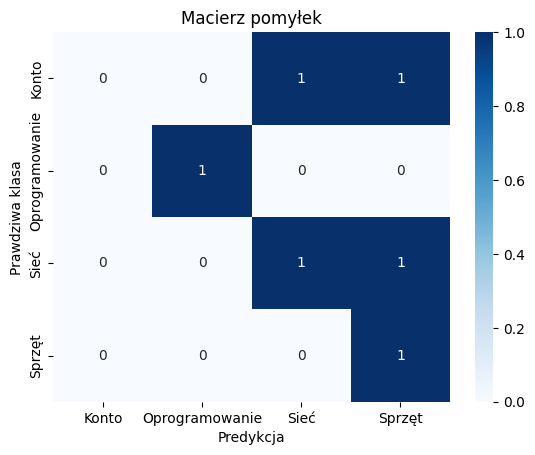

In [ ]:
y_pred = model.predict(X_test_vec)

print("\n=== Raport klasyfikacji ===")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=model.classes_, yticklabels=model.classes_
)
plt.xlabel('Predykcja')
plt.ylabel('Prawdziwa klasa')
plt.title('Macierz pomyłek')
plt.show()

## 🎯 10. Zadanie otwarte

Spróbuj zmodyfikować dane lub słownik lematyzacji i zobacz jak zmienia się skuteczność modelu!

### 📖 Wytłumaczenie:
Model jest wrażliwy na zmiany danych — możesz sprawdzić jak nowe zgłoszenia wpływają na jego wyniki.

### 💡 Ćwiczenie:
Dodaj nowe zgłoszenia (np. "Błąd systemu Windows") i przypisz kategorię, przetrenuj model ponownie.


In [ ]:
print("\n💡 Zadanie: Spróbuj zmodyfikować listę lemma_map lub zmienić teksty wejściowe, "
      "aby zobaczyć jak zmienia się skuteczność modelu!")


💡 Zadanie: Spróbuj zmodyfikować listę lemma_map lub zmienić teksty wejściowe, aby zobaczyć jak zmienia się skuteczność modelu!



=== Raport klasyfikacji na dużym zbiorze ===
                precision    recall  f1-score   support

         Konto       1.00      1.00      1.00        15
Oprogramowanie       1.00      1.00      1.00        15
          Sieć       1.00      0.80      0.89        15
        Sprzęt       0.83      1.00      0.91        15

      accuracy                           0.95        60
     macro avg       0.96      0.95      0.95        60
  weighted avg       0.96      0.95      0.95        60



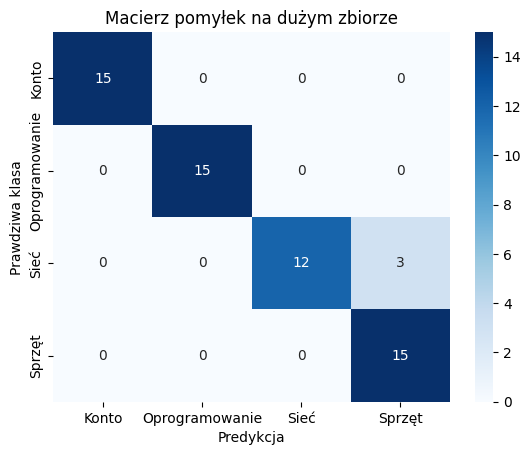

In [ ]:
# 11. Skalowanie na większym zbiorze danych

# Wczytanie większego zbioru
df_large = pd.read_csv('large_tickets.csv')

# Czyszczenie i lematyzacja
df_large['text_clean'] = df_large['text'].apply(clean_text).apply(apply_lemma)

# Podział na trening/test
X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(
    df_large['text_clean'], df_large['label'], test_size=0.3, random_state=42, stratify=df_large['label']
)

# Wektoryzacja
X_train_large_vec = vectorizer.fit_transform(X_train_large)
X_test_large_vec = vectorizer.transform(X_test_large)

# Trenowanie
model_large = LogisticRegression()
model_large.fit(X_train_large_vec, y_train_large)

# Ewaluacja
y_pred_large = model_large.predict(X_test_large_vec)
print("\n=== Raport klasyfikacji na dużym zbiorze ===")
print(classification_report(y_test_large, y_pred_large, zero_division=0))

# Macierz pomyłek
cm_large = confusion_matrix(y_test_large, y_pred_large, labels=model_large.classes_)
sns.heatmap(cm_large, annot=True, fmt='d', cmap='Blues', xticklabels=model_large.classes_, yticklabels=model_large.classes_)
plt.xlabel('Predykcja')
plt.ylabel('Prawdziwa klasa')
plt.title('Macierz pomyłek na dużym zbiorze')
plt.show()
